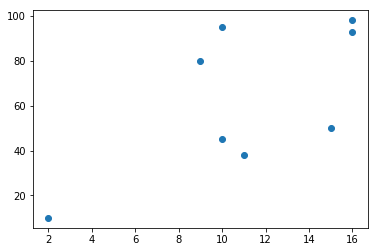

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
# from IPython.display import display, Math, Latex

my_data = np.genfromtxt('data.csv', delimiter=',') # read the data
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
## 1 array for bias
y = my_data[:, 1].reshape(-1,1) # create the y matrix

dataset  = pd.read_csv("ml_assi1.csv")
plt.scatter( my_data[:, 0] , y)
plt.show()



### Hyperparameters

In [3]:
alpha = 0.0001
iters = 1000

# 1 attribute (X) 
# 2 initial ramdom values (one bias) m and c | y = mx+c
theta = np.array([[1.0, 1.0]])

## Cost Function  : Sum of Mean square Error

$$ 
J(\theta)=\frac{1}{2m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
 $$


In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

print("Cost for (m=1 and c=1) :",computeCost(X, y, theta))

Cost for (m=1 and c=1) : 1708.125


## Least Mean Square(LMS) Algorithm 

### &emsp;&emsp;Gradient Descent


$$ 
\theta_{j} :=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
 $$
 
 ### &emsp;&emsp; Derivative of Cost Function
 
 $$ 
\begin{aligned} \frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2m}\left(h_{\theta}(x)-y\right)^{2} \\ &=2 \cdot \frac{1}{2m}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\ &=\frac{1}{m}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\ &=\frac{1}{m}\left(h_{\theta}(x)-y\right) x_{j} \end{aligned}
 $$

In [11]:
#Slope : The amount that y increases as x increases some amoun

def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
#         if i % 10 == 0: # just look at cost every ten loops for debugging
#             print(cost)
    return (theta, cost)

g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

## g : parameters ans
## cost  : least cost

[[1.49628401 5.45209728]] 267.22470244578153


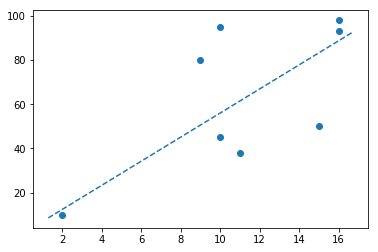

In [12]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')

In [15]:
def predict(x):
    return g[0][0] + g[0][1]* x

predict(6)

34.2088676751875